In [4]:
import sys
sys.path.append('..')
from dataset import Readdata, Cloudset
from utils import *
import matplotlib.pyplot as plt

def draw_4(img, mask, image_name=''):
    # img: [H, W, C] int32 (0, 255)
    # mask: [C, H, W] float32 (0,1)
    
    fig = plt.figure(figsize=(25, 13))
    name_d = global_dict()
    for i in range(4):
        name = name_d[i]
        ax = fig.add_subplot(2, 2, i + 1, xticks=[], yticks=[])
        plt.imshow(img)
        plt.imshow(mask[i], alpha=0.4, cmap='gray')
        ax.set_title("Label: %s" % (name))

def draw_2(img, mask_1, mask_2):
    # img
    # mask1: from unet
    # mask2: ground truth
    fig = plt.figure(figsize=(25, 6))
    ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
    plt.imshow(img)
    plt.imshow(mask_1, alpha=0.4, cmap='gray')
    ax.set_title('from unet')
    ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
    plt.imshow(img)
    plt.imshow(mask_2, alpha=0.4, cmap='gray')
    ax.set_title('ground truth')

def draw_img(img_name):
    print('image name: %s' % img_name)
    sample_i, sample_m = valid_raw.gen_item(img_name)
    sample_i = np.array(np.transpose(sample_i, [1, 2, 0]), dtype=np.int32)
    draw_4(sample_i, sample_m)

def trans(img):
    return np.array(np.transpose(img, [1, 2, 0]), dtype=np.int32)

base_path = '../../data'
r =  Readdata(base_path)
print(r.test_rate)
print(len(r.train), len(r.train_ids), len(r.valid_ids))
valid_set = Cloudset(
    r.train,
    'valid',
    r.valid_ids,
    r.train_fold,
    validation_augmentation_kaggle()
)
valid_raw = Cloudset(
    r.train,
    'valid_raw',
    r.valid_ids,
    r.train_fold,
    validation_augmentation()
)
print('valid_set', valid_set.__len__(), valid_raw.__len__())
train_set = Cloudset(
    r.train,
    'train',
    r.train_ids,
    r.train_fold,
    training_augmentation_kaggle()
)

print('train_set', train_set.__len__())
r.valid_ids[:10]

0.1
22184 4991 555
valid_set 555 555
train_set 4991


array(['ebd2c6a.jpg', '74aa0c5.jpg', '888f3b3.jpg', '09a95c4.jpg',
       '4d19d32.jpg', '34687a0.jpg', '265e050.jpg', '0778609.jpg',
       '471bc46.jpg', 'b2679b2.jpg'], dtype=object)

In [2]:
# we have valid_set
# we set a model name
import torch
from model import Unet
device = torch.device('cpu')

model_id = '../checkpoint/kaggle.pt'
net = Unet(3, 4).float()
net.load_state_dict(torch.load(model_id, map_location=device))
valid_set.ids[:100]

array(['8211401.jpg', 'bd62341.jpg', '9335159.jpg', '6a9050d.jpg',
       'c51d959.jpg', '9bc4937.jpg', 'a396614.jpg', '8dd6979.jpg',
       '9360e71.jpg', 'eaaf7e4.jpg', '87a1831.jpg', 'b4609a0.jpg',
       'd9f3a39.jpg', 'ac51e46.jpg', 'c52a85f.jpg', 'f090609.jpg',
       '5a2351f.jpg', 'c0d8f0e.jpg', '6cd4036.jpg', '4d68e00.jpg',
       '3c590a8.jpg', 'a9483d2.jpg', '94eeec2.jpg', 'aa1c9f5.jpg',
       '79d0279.jpg', '4e80c08.jpg', 'a108169.jpg', 'e6a8ba4.jpg',
       'c3fc59b.jpg', '136d170.jpg', 'de6dcdd.jpg', 'ce0e3d9.jpg',
       'b34d791.jpg', '46d61a0.jpg', '305f17c.jpg', '74f442e.jpg',
       'e7b9c69.jpg', 'd2a540d.jpg', 'b6d428b.jpg', 'd2c4532.jpg',
       '324b73e.jpg', '38d1dcb.jpg', 'a7d653f.jpg', '73c603c.jpg',
       '874e832.jpg', 'd03df83.jpg', '9452e1c.jpg', '8695732.jpg',
       'a067edf.jpg', 'fd5aa5d.jpg', '7639280.jpg', 'f11b05a.jpg',
       'dda6e34.jpg', 'da27960.jpg', 'fd5b3ab.jpg', 'e678b7a.jpg',
       '38d89be.jpg', '5797732.jpg', 'd3e7f2e.jpg', '7c8e4c5.j

image name: 8211401.jpg


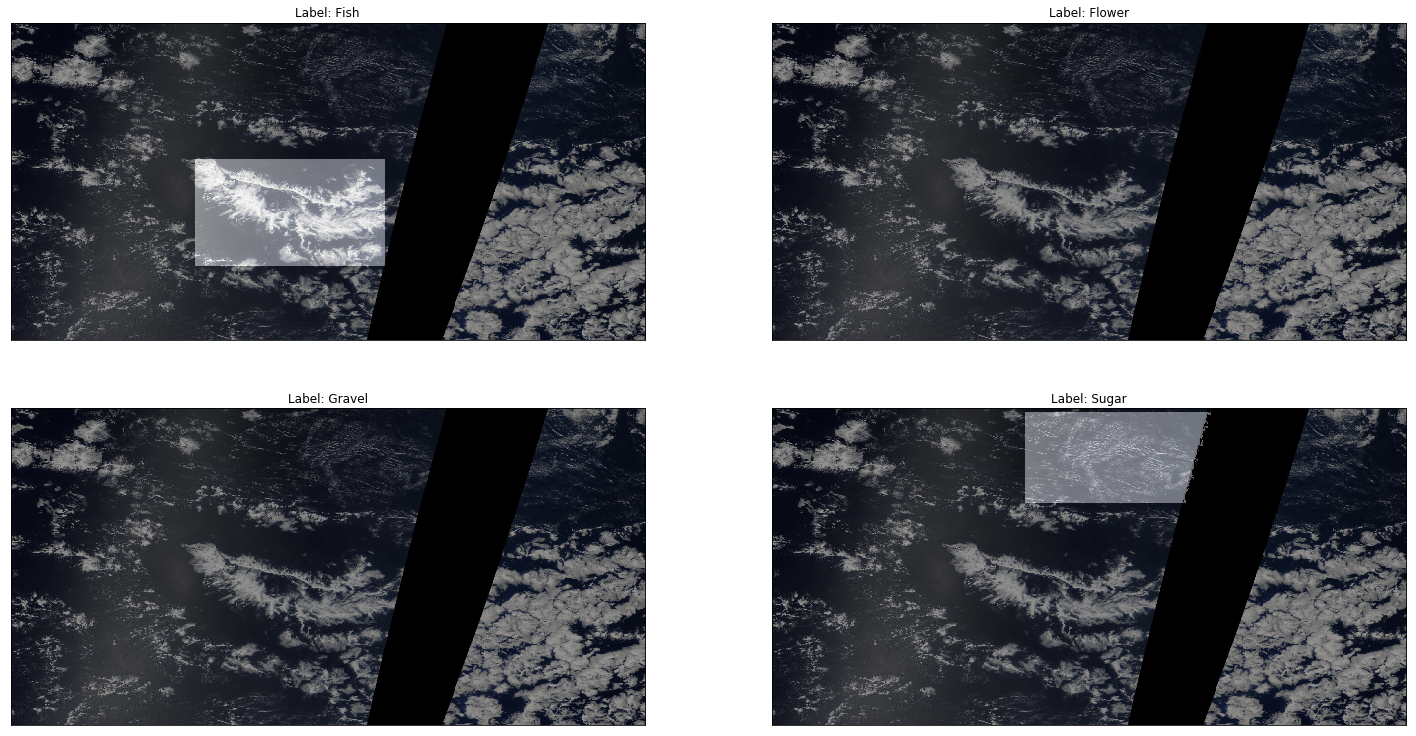

In [22]:
iid = '8211401.jpg'
sample_i, sample_m = valid_set.gen_item(iid)
draw_img(iid)

In [23]:
net.eval()
with torch.no_grad():
    img = np.reshape(sample_i, (1,) + sample_i.shape)
    img = torch.from_numpy(img).float()
    print(img.shape)
    mask_pr = net(img).detach().numpy()[0]
    print(mask_pr.shape)

torch.Size([1, 3, 320, 640])
(4, 320, 640)


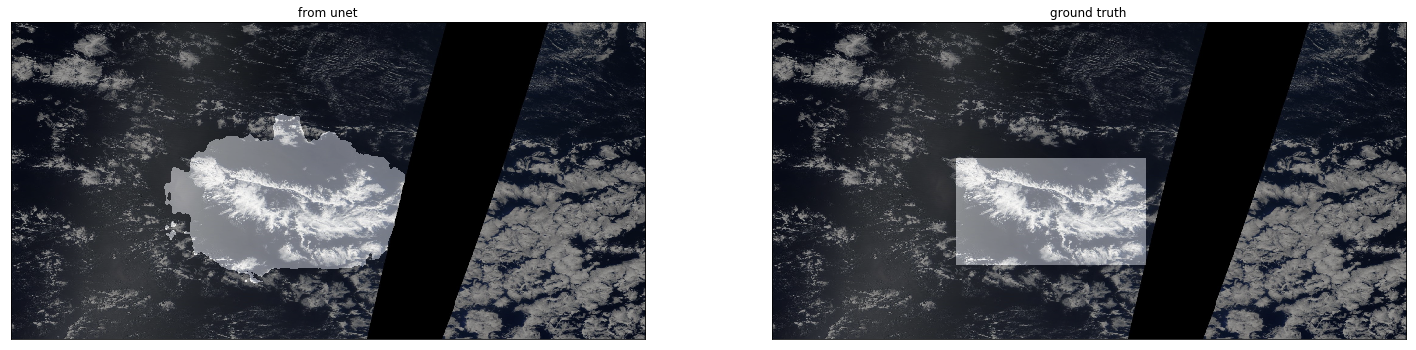

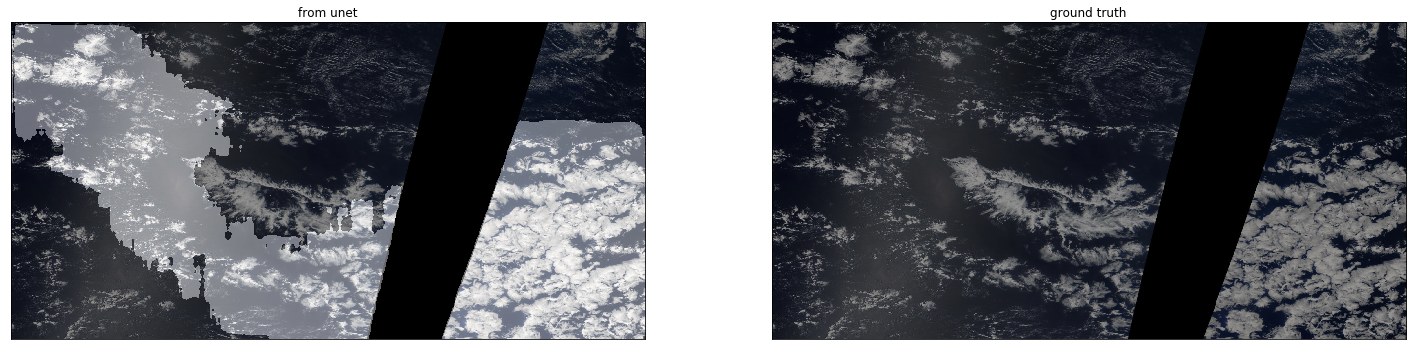

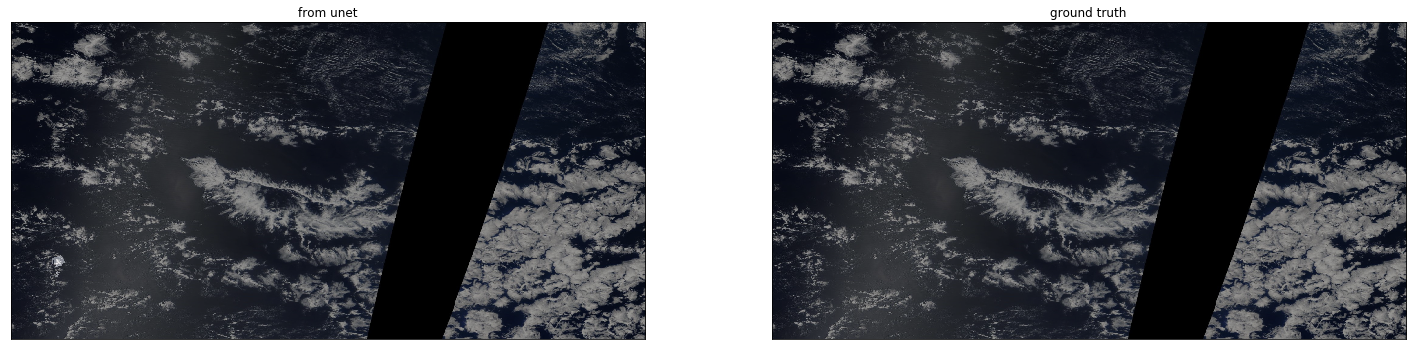

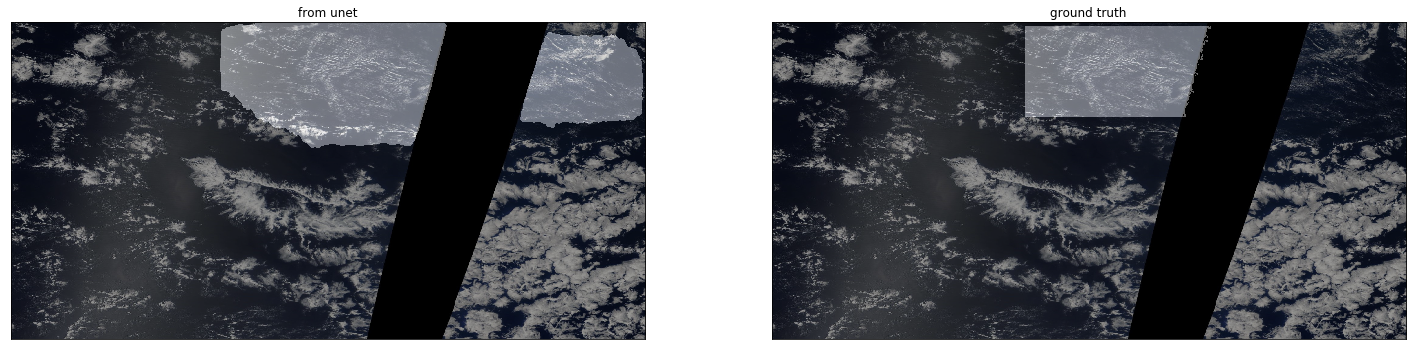

In [28]:
gt_i, gt_m = valid_raw.gen_item(iid)
thrs = [0.5, 0.5, 0.5, 0.5]
for i in range(4):
    draw_2(trans(gt_i), mask_pr[i] > thrs[i], gt_m[i])